In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

# Take-home exercises

Using a dataset, try this hands-on exercise:

0. First, review what we've seen!

1. Load the data using pandas: `pd.read_csv('../datasets/Advertising.csv')`

2. Do a pairplot to investigate any correlations

3. Check your intuitions with the `.corr()` function of your dataset

4. Create a simple linear model using `scikit`'s `LinearRegression`

5. Create the same model using the library `statsmodels.formula.api` or the 

### Hands on exercise!

Remember to correctly load the data in your notebook!

In [3]:
df_adv = pd.read_csv('data/Advertising.csv')

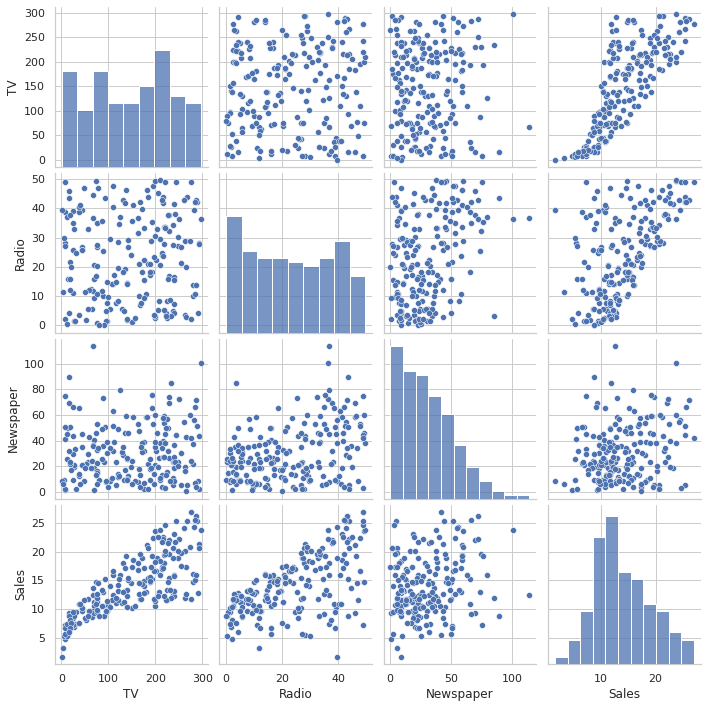

In [4]:
sns.pairplot(df_adv); 

In [5]:
df_adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


* Create three independent simple linear regression models
    * Interpret the results
**Note** pay special attention to the significance of the `Newspaper variable`.

In [6]:
# Your code here

In [7]:
# Sales ~ TV
results = smf.ols('Sales ~ TV', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.47e-42
Time:                        23:37:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Sales ~ Radio
results = smf.ols('Sales ~ Radio', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.35e-19
Time:                        23:37:55   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Sales ~ Newspaper
results = smf.ols('Sales ~ Newspaper', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 13 Apr 2021   Prob (F-statistic):            0.00115
Time:                        23:37:55   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression

Of course, the hours one studies is not the only important factor to get good grades. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m   + \epsilon$$


In [10]:
# We generate data following the linear population model
# but now we have more than one X!

# Why do we do this? Because we assume relationships in the data are linear,
# and this is a way of obtaining data with that assumption.

# In real life, we won't know the true relationships in the data,
# but plotting the variables can show us that there might be some
# linear relationships that we can exploit.

num_points = 100

beta_0 = 11.75
beta_1 = 0.08     # hours of study
beta_2 = -0.03    # party hours

X_1 = np.random.normal(500, 200, num_points)
X_2 = np.random.normal(500, 200, num_points)

y = (beta_0) + (beta_1 * X_1) + (beta_2 * X_2)  + (np.random.normal(loc=0,scale=5,size=num_points))

In [11]:
data = pd.DataFrame({'grades': y, 
                     'study_hours': X_1,
                     'party_hours': X_2})

In [12]:
data

,grades,study_hours,party_hours
0,19.044133,282.873879,628.410938
1,61.584328,699.469089,104.422414
2,48.007579,556.595700,642.452927
3,0.500946,198.741057,1019.660785
4,27.608616,384.279950,495.074804
...,...,...,...
95,76.113098,706.222892,-146.211002
96,30.391677,283.086418,446.141302
97,17.678032,227.305691,477.829856
98,45.670702,575.880122,431.747657


In [13]:
data.study_hours.min()

-59.717821092144845

In [14]:
data.study_hours.max()

978.4730531875452

In [15]:
data.party_hours.min()

-146.2110015838624

In [16]:
data.party_hours.max()

1019.6607854538629

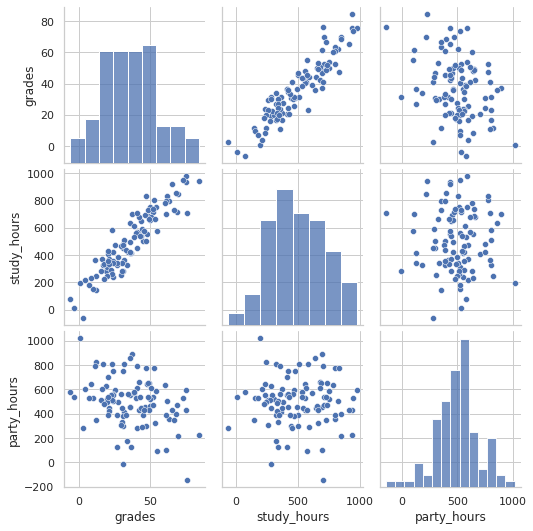

In [17]:
sns.pairplot(data);

The coefficients of the multiple linear regression are computed similarly to the simple linear regression case. They minimize:

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{\beta_0} +  \hat{\beta_1} X_1 + \hat{\beta_2} X_2 + \dots + \hat{\beta_2} X_m$$


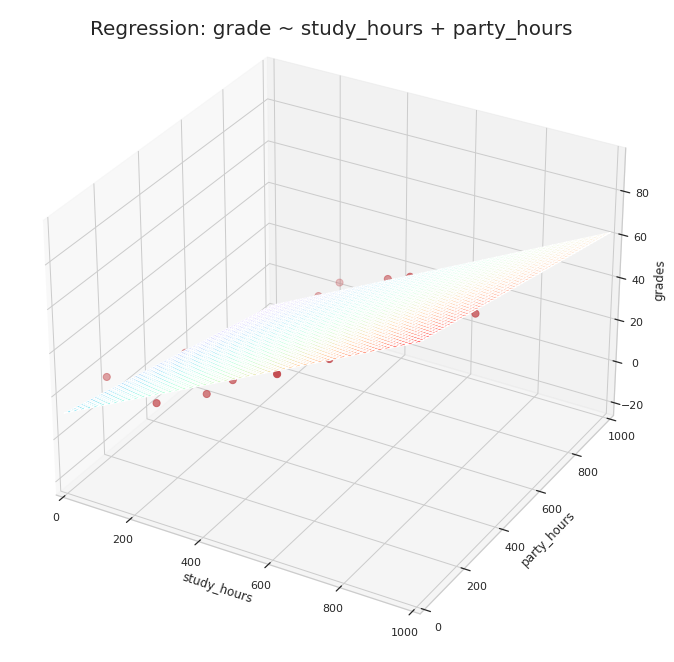

In [19]:
# Create plot
study_hours = np.arange(0,1000)  # limits of my plot (~ variables)
party_hours = np.arange(0,1000)  # limits of my plot (~ variables)

B1, B2 = np.meshgrid(study_hours, party_hours, indexing='xy')
Z = np.zeros((study_hours.size, party_hours.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(beta_0 + B1[i,j]*beta_1 + B2[i,j]*beta_2)

fig = plt.figure()
fig.suptitle('Regression: grade ~ study_hours + party_hours', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, cmap='rainbow', alpha=1)
ax.scatter3D(X_1, X_2, y , c='r', s=50)

ax.set_xlabel('study_hours')
ax.set_xlim(0, 1000)
ax.set_ylabel('party_hours')
ax.set_ylim(0, 1000)
ax.set_zlabel('grades');

In [20]:
results = smf.ols('grades ~ study_hours + party_hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     729.6
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           3.49e-59
Time:                        23:38:14   Log-Likelihood:                -299.53
No. Observations:                 100   AIC:                             605.1
Df Residuals:                      97   BIC:                             612.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.6424      1.756      6.631      0.000       8.158      15.127
study_hours     0.0787      0.002     36.157      0.000       0.074       0.083
party_hours    -0.0294      0.003    -11.624      0.000      -0.034      -0.024
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.328
Skew:                           0.280   Prob(JB):                        0.515
Kurtosis:                       3.079   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Advertising example

In [21]:
# Sales ~ TV + Radio + Newspaper
results = smf.ols('Sales ~ TV + Radio + Newspaper', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        23:38:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

See * [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) section 3.2.1 to make sense of this result!

## Categorical variables

Very often we face situations in which the predictors are *qualitative* in nature. A good example could be the sex of  a person, which can take the vales $M$ or $F$. 

In [22]:
data['sex'] = np.random.choice(['M', 'F'], num_points) 
data

,grades,study_hours,party_hours,sex
0,19.044133,282.873879,628.410938,M
1,61.584328,699.469089,104.422414,M
2,48.007579,556.595700,642.452927,F
3,0.500946,198.741057,1019.660785,M
4,27.608616,384.279950,495.074804,M
...,...,...,...,...
95,76.113098,706.222892,-146.211002,F
96,30.391677,283.086418,446.141302,M
97,17.678032,227.305691,477.829856,F
98,45.670702,575.880122,431.747657,F


In [23]:
# pd.get_dummies(data)  # dummy variables for (numerical) categorial ones
# data.sex.str.get_dummies()
data['is_male'] = data.sex.str.get_dummies()['M']
data

,grades,study_hours,party_hours,sex,is_male
0,19.044133,282.873879,628.410938,M,1
1,61.584328,699.469089,104.422414,M,1
2,48.007579,556.595700,642.452927,F,0
3,0.500946,198.741057,1019.660785,M,1
4,27.608616,384.279950,495.074804,M,1
...,...,...,...,...,...
95,76.113098,706.222892,-146.211002,F,0
96,30.391677,283.086418,446.141302,M,1
97,17.678032,227.305691,477.829856,F,0
98,45.670702,575.880122,431.747657,F,0


We include this information in the model via a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      0  \quad \text{if person is female} \\
      1  \quad \text{if person is male} \\
\end{array} 
\right. 
$$

If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if i-th person is male} \\
      \beta_0 + \epsilon_i  \quad \text{if i-th person is female} \\
\end{array} 
\right.  $$

In this setting $\beta_0$ represents the average grade among females, and $\beta_0 + \beta_1$ the average grade for males.

In [25]:
results = smf.ols('grades ~  study_hours + is_male', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     281.2
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.25e-41
Time:                        23:39:37   Log-Likelihood:                -342.46
No. Observations:                 100   AIC:                             690.9
Df Residuals:                      97   BIC:                             698.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.2421      2.027     -1.106      0.271      -6.265       1.781
study_hours     0.0792      0.003     23.681      0.000       0.073       0.086
is_male        -1.7645      1.514     -1.166      0.247      -4.769       1.240
==============================================================================
Omnibus:                        0.868   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.449
Skew:                           0.121   Prob(JB):                        0.799
Kurtosis:                       3.222   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

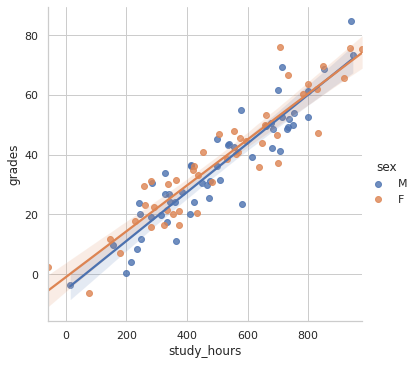

In [26]:
sns.lmplot(x='study_hours', y='grades', data=data, hue='sex');

## Extensions to the linear model

There are several assumptions that are used when fitting a linear model. Two of them are:
* **Additive assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors.
* **Linear assumption** The change in response for a one unit increase in $X_j$ is the same no matter what is the value of $X_j$.


# Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we might think that the more our ads are listened in the radio, the more effective our TV ads are. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

[This is a commonly studied topic in marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

In [27]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          6.68e-146
Time:                        23:42:34   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remember the **Hierarchical principle:**

"*If we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant*"

In [28]:
data

,grades,study_hours,party_hours,sex,is_male
0,19.044133,282.873879,628.410938,M,1
1,61.584328,699.469089,104.422414,M,1
2,48.007579,556.595700,642.452927,F,0
3,0.500946,198.741057,1019.660785,M,1
4,27.608616,384.279950,495.074804,M,1
...,...,...,...,...,...
95,76.113098,706.222892,-146.211002,F,0
96,30.391677,283.086418,446.141302,M,1
97,17.678032,227.305691,477.829856,F,0
98,45.670702,575.880122,431.747657,F,0


**Exercise** [FAKE!]

Imagine there is a theory that states that partying out has more negative effect on males compared to females in terms of grades in the exams. That is, that there is a (negative) *synergetic* effect between both variables. Use the (mock) data to refute of validate this hypothesis.

In [30]:
# interaction model
results = smf.ols('grades ~ study_hours + party_hours + is_male + party_hours * is_male', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     357.8
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.38e-56
Time:                        23:44:32   Log-Likelihood:                -299.46
No. Observations:                 100   AIC:                             608.9
Df Residuals:                      95   BIC:                             621.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.0918      2.158      5.604      0.000       7.808      16.375
study_hours             0.0788      0.002     35.655      0.000       0.074       0.083
party_hours            -0.0303      0.004     -8.013      0.000      -0.038      -0.023
is_male                -1.0080      2.751     -0.366      0.715      -6.468       4.452
party_hours:is_male     0.0018      0.005      0.341      0.734      -0.009       0.012
==============================================================================
Omnibus:                        1.883   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.473
Skew:                           0.291   Prob(JB):                        0.479
Kurtosis:                       3.124   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Challenging the linear assumption: polynomial regression

In [45]:
beta_1 = 0.005
beta_0 = 12
num_points = 100
X = np.random.uniform(1,6, num_points)

# And the grades are...
y = beta_0 + (beta_1 * np.exp(X)) + np.random.normal(loc=0, scale=0.05, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

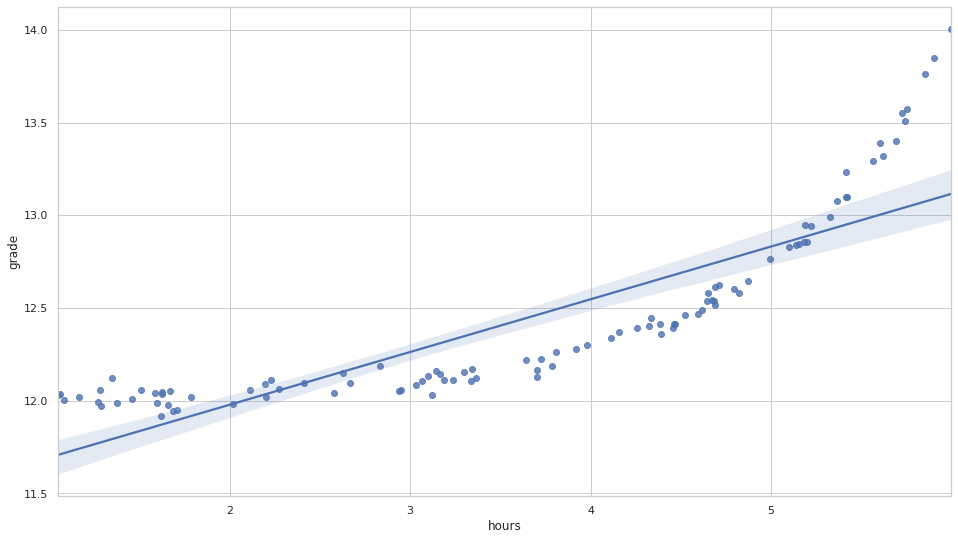

In [46]:
sns.regplot(x='hours', y='grade', data=data);

In [36]:
data.corr()

,grade,hours
grade,1.000000,0.877025
hours,0.877025,1.000000


In [47]:
# interaction model
results = smf.ols('grade ~ hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     272.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.01e-30
Time:                        23:48:06   Log-Likelihood:                -4.7801
No. Observations:                 100   AIC:                             13.56
Df Residuals:                      98   BIC:                             18.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4098      0.067    169.503      0.000      11.276      11.543
hours          0.2843      0.017     16.492      0.000       0.250       0.318
==============================================================================
Omnibus:                       19.054   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.859
Skew:                           1.070   Prob(JB):                     1.09e-05
Kurtosis:                       3.950   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
data['hours_exp'] = np.exp(data['hours'])

In [49]:
data

,grade,hours,hours_exp
0,11.942941,1.684467,5.389578
1,12.538077,4.684517,108.257980
2,13.507915,5.743789,312.245280
3,12.541650,4.674341,107.161957
4,12.044465,1.623394,5.070268
...,...,...,...
95,12.059633,1.509546,4.524674
96,12.034569,1.056642,2.876695
97,12.004247,1.081342,2.948633
98,12.516511,4.687333,108.563243


In [50]:
# interaction model
results = smf.ols('grade ~ hours + hours_exp', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     6723.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          9.31e-105
Time:                        23:49:09   Log-Likelihood:                 175.74
No. Observations:                 100   AIC:                            -345.5
Df Residuals:                      97   BIC:                            -337.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9884      0.015    808.822      0.000      11.959      12.018
hours          0.0056      0.006      1.016      0.312      -0.005       0.017
hours_exp      0.0049   8.29e-05     59.080      0.000       0.005       0.005
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.313
Skew:                           0.125   Prob(JB):                        0.855
Kurtosis:                       3.112   Cond. No.                         488.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model selection

### Adjusted $R^2$

There is a funny thing with $R^2$. Look at what happens when we include *Random* variables!!

In [51]:
df_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [52]:
df_adv['rand_1'] = np.random.normal(size=200)
df_adv['rand_2'] = np.random.normal(size=200)
df_adv['rand_3'] = np.random.normal(size=200)
df_adv['rand_4'] = np.random.normal(size=200)
df_adv['rand_5'] = np.random.normal(size=200)
df_adv['rand_6'] = np.random.normal(size=200)
df_adv['rand_7'] = np.random.normal(size=200)
df_adv['rand_8'] = np.random.normal(size=200)

In [55]:
results = smf.ols('Sales ~ TV + Radio + Newspaper + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + rand_8', 
                  data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     151.9
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.89e-87
Time:                        23:50:52   Log-Likelihood:                -384.53
No. Observations:                 200   AIC:                             793.1
Df Residuals:                     188   BIC:                             832.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0222      0.322      9.374      0.000       2.386       3.658
TV             0.0455      0.001     31.800      0.000       0.043       0.048
Radio          0.1869      0.009     20.913      0.000       0.169       0.205
Newspaper     -0.0012      0.006     -0.192      0.848      -0.013       0.011
rand_1         0.0576      0.129      0.448      0.655      -0.196       0.311
rand_2         0.0851      0.119      0.717      0.474      -0.149       0.319
rand_3         0.1568      0.134      1.169      0.244      -0.108       0.421
rand_4        -0.0207      0.131     -0.158      0.875      -0.279       0.238
rand_5         0.0924      0.123      0.749      0.454      -0.151       0.336
rand_6        -0.0838      0.123     -0.682      0.496      -0.326       0.158
rand_7        -0.0714      0.125     -0.573      0.567      -0.317       0.174
rand_8         0.0524      0.125      0.421      0.675      -0.194       0.298
==============================================================================
Omnibus:                       56.907   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.321
Skew:                          -1.271   Prob(JB):                     4.12e-30
Kurtosis:                       6.127   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `Adj. R-squared` coefficient is meant to penalize the $R^2$ of a model when including *too many* variables. 
$$\bar R^2 = 1-(1-R^2){n-1 \over n-p-1}$$

There are other statistics to reflect the quality of a model auch as `AIC` ([Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion)) and the `BIC` ([Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)) --- did you noticed these names in the results from statsmodels? In both cases, the lowest the better.



## Stepwise selection

One should always aim to have a model as simple as possible! We will study other ways of doing this using **regularization**, but so far the methods we describe here are rather useful!

#### Best subset selection

1. Start with a model with no predictors (just the intercept). This model is $\mathcal{M_0}$ 
2. for $k = 0,1,..., p-1$
    * consider all ${p \choose k}$ models that contain exactly one predictor
    * choose the *best* among these ${p \choose k}$ models, and call it $\mathcal{M_{k+1}}$. Here best is defined as having the smallest $RSS$ of highest $R^2$.
3. Select the single best model among $\mathcal{M_0}, \dots, \mathcal{M_p}$ using either $R_{adj}^2$, $BIC$, or $AIC$.

#### Forward stepwise selection

1. Start with a model with no predictors (just the intercept). This model is $\mathcal{M_0}$ 
2. For $k = 0,1,..., p-1$
    * consider all $p-k$ models that augment the predictors in $\mathcal{M_k}$  with one additional predictor.
    * choose the *best* among these $p-k$ models, and call it $\mathcal{M_{k+1}}$. Here best is defined as having the smallest $RSS$ of highest $R^2$.
3. Select the single best model among $\mathcal{M_0}, \dots, \mathcal{M_p}$ using either $R_{adj}^2$, $BIC$, or $AIC$.

## Potential problems in Linear Regression

The main assumptions of a linear model are:

* Data is linear 
* Errors are not correlated
* Variance of error terms is constant

What if these assumptions are not met? Can we apply a linear regression model and expect to predict good results?

Additionally, our models may suffer from other issues such as:
* Outliers
* High Leverage points
* Collinearity
* Missing values

Watch this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.
Read section 3.3.3 of the book [Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf).

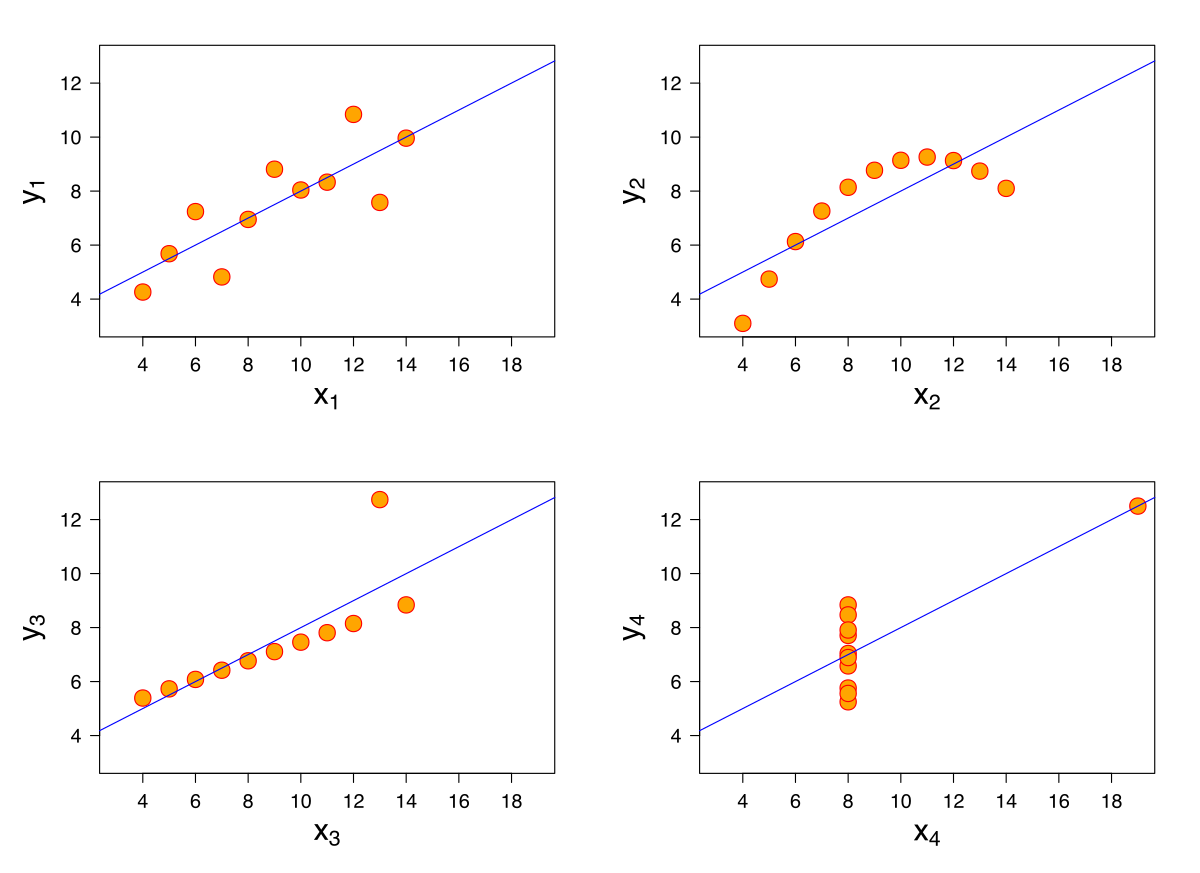

See [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

# Mini-project

You will be conducting a project next week to predict the prices in the [Boston Houses dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), using everything you have learnt so far about linear regression!

See [repo](https://github.com/agalvezcorell/linear-regression-boston-housing/blob/main/mini-project.ipynb).

# References: 

* [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)